# **Tutorial: Linear Regression**

**Example 1**

In [1]:
# Import the tensorflow and other libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt

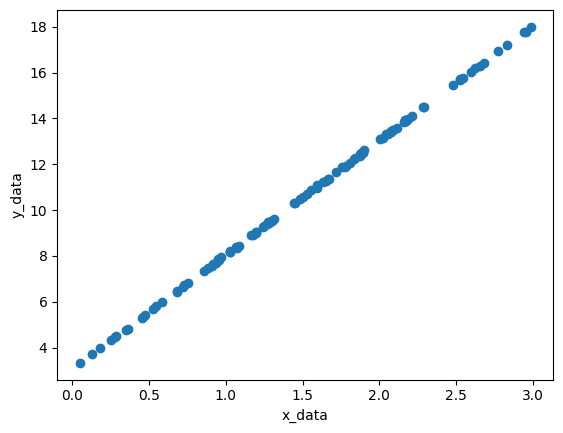

In [2]:
# Training and Testing Data
r = np.random.RandomState(123)
x_data = 3 * r.rand(100)
y_data = 5 * x_data + 3 + 0.1 * r.rand(100) # w_1 = 5, w_0 = 3
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
plt.scatter(x_data, y_data)
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.show()

In [3]:
# Gradient-descent solution
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = models.Sequential()
model.add(layers.Normalization(input_shape=(1,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [4]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=2000,
                    validation_data=(x_test, y_test))

Epoch 1/2000
3/3 [==============================] - 7s 184ms/step - loss: 10.2000 - mean_absolute_error: 10.2000 - val_loss: 10.1617 - val_mean_absolute_error: 10.1617
Epoch 2/2000
3/3 [==============================] - 0s 17ms/step - loss: 10.1924 - mean_absolute_error: 10.1924 - val_loss: 10.1542 - val_mean_absolute_error: 10.1542
Epoch 3/2000
3/3 [==============================] - 0s 15ms/step - loss: 10.1849 - mean_absolute_error: 10.1849 - val_loss: 10.1467 - val_mean_absolute_error: 10.1467
Epoch 4/2000
3/3 [==============================] - 0s 19ms/step - loss: 10.1774 - mean_absolute_error: 10.1774 - val_loss: 10.1393 - val_mean_absolute_error: 10.1393
Epoch 5/2000
3/3 [==============================] - 0s 18ms/step - loss: 10.1700 - mean_absolute_error: 10.1700 - val_loss: 10.1319 - val_mean_absolute_error: 10.1319
Epoch 6/2000
3/3 [==============================] - 0s 26ms/step - loss: 10.1625 - mean_absolute_error: 10.1625 - val_loss: 10.1244 - val_mean_absolute_error: 10.12

In [5]:
# Print weight w_1 and bias w_0
W = model.layers[1].get_weights()
print(W)


[array([[4.833867]], dtype=float32), array([3.3551207], dtype=float32)]


1/1 - 0s - loss: 0.1148 - mean_absolute_error: 0.1148 - 31ms/epoch - 31ms/step
0.11481957882642746


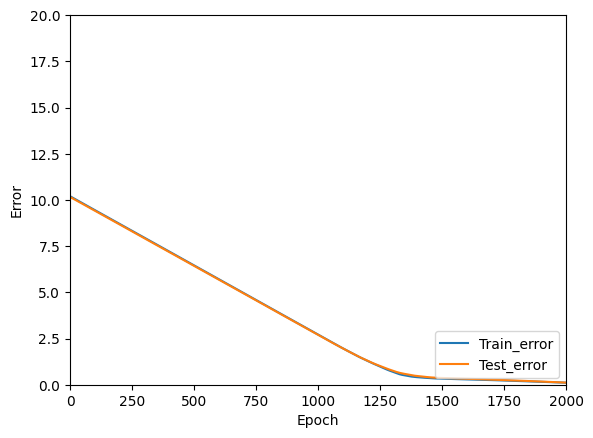

In [6]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

**Example 2**

In [7]:
# Training and Testing Data
r = np.random.RandomState(123)
x_data = 3 * r.rand(100,2)
y_data = 3 + 5 * x_data[:,0] + 6 * x_data[:,1] + 0.1 * r.rand(100) # [w_1,w_2] = [5,6], w_0 = 3
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [8]:
# Gradient-descent solution
model = models.Sequential()
model.add(layers.Normalization(input_shape=(2,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6
Trainable params: 3
Non-trainable params: 3
_________________________________________________________________


In [9]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=3500,
                    validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 31ms/step - loss: 4.9820 - mean_absolute_error: 4.9820 - val_loss: 5.3117 - val_mean_absolute_error: 5.3117
Epoch 1002/3500
3/3 [==============================] - 0s 26ms/step - loss: 4.9702 - mean_absolute_error: 4.9702 - val_loss: 5.2995 - val_mean_absolute_error: 5.2995
Epoch 1003/3500
3/3 [==============================] - 0s 28ms/step - loss: 4.9583 - mean_absolute_error: 4.9583 - val_loss: 5.2873 - val_mean_absolute_error: 5.2873
Epoch 1004/3500
3/3 [==============================] - 0s 29ms/step - loss: 4.9466 - mean_absolute_error: 4.9466 - val_loss: 5.2750 - val_mean_absolute_error: 5.2750
Epoch 1005/3500
3/3 [==============================] - 0s 30ms/step - loss: 4.9349 - mean_absolute_error: 4.9349 - val_loss: 5.2626 - val_mean_absolute_error: 5.2626
Epoch 1006/3500
3/3 [==============================] - 0s 30ms/step - loss: 4.9228 - mean_absolute_error: 4.9228 - val_loss: 5.2502 - v

1/1 - 0s - loss: 0.0318 - mean_absolute_error: 0.0318 - 34ms/epoch - 34ms/step
0.0318005234003067


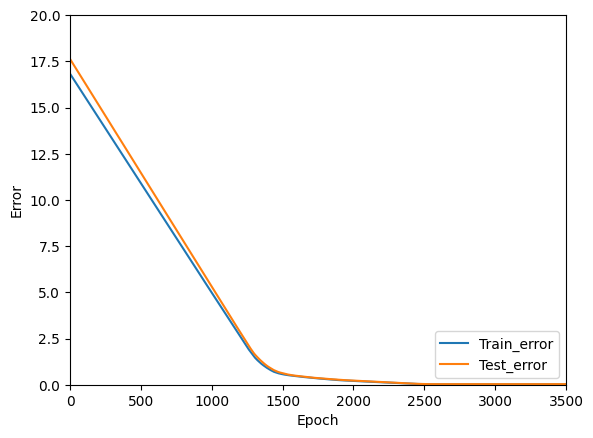

In [10]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 3500])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [11]:
# Print weight [w_1, w_2] and bias w_0
W = model.layers[1].get_weights()
print(W)

[array([[4.985998 ],
       [6.0092807]], dtype=float32), array([3.064729], dtype=float32)]
